In [314]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns 
import numpy as np
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')
%matplotlib inline

In [315]:
# pengecekan data dari truk.csv
#hanya menggunakan kolom city_pupulation dan food_truck_profit
df = pd.read_csv('truk.csv', usecols=['city_population','food_truck_profit'])

In [316]:
#Melihat 5 baris data teratas dari data
df.head()

,city_population,food_truck_profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [317]:
#mengetahui jumlah kolom dan baris pada data
df.shape

(97, 2)

In [318]:
#melihat statistical description dari data mulai dari mean, kuartil, standard deviation
df.describe()

,city_population,food_truck_profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_population    97 non-null     float64
 1   food_truck_profit  97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [320]:
df.isnull().sum()

city_population      0
food_truck_profit    0
dtype: int64

In [321]:
#import dataset
dataset = pd.read_csv('truk.csv')

#Tampilkan 5 baris pertama dari dataset
print (dataset.head())

   city_population  food_truck_profit
0           6.1101            17.5920
1           5.5277             9.1302
2           8.5186            13.6620
3           7.0032            11.8540
4           5.8598             6.8233


In [322]:
#cek jumlah missing values pada kolom
print(dataset['city_population'].isna().sum())

# mengganti missing values pada kolom dengan nilai baru
dataset ['city_population'].fillna('0', inplace=True)

# cek kembali jumlah missing values pada kolom
print(dataset['city_population'].isna().sum())

0
0


Visualisasi Data

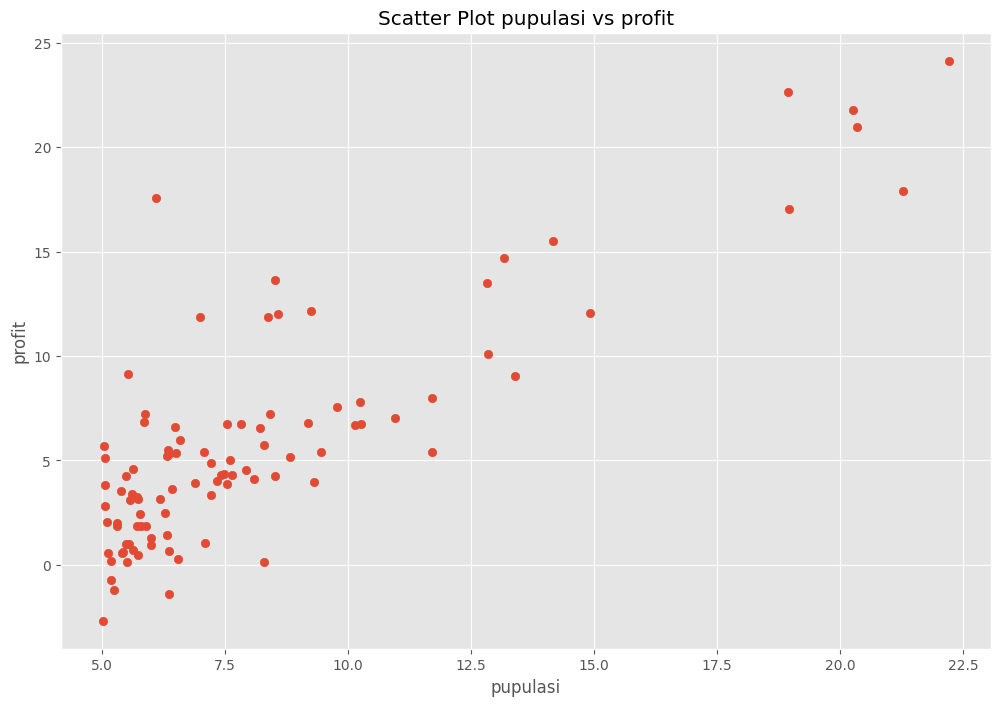

In [323]:
#Bivariate analysis city population dan food truck profit
plt.scatter(df['city_population'], df['food_truck_profit'])
plt.xlabel('pupulasi')
plt.ylabel('profit')
plt.title('Scatter Plot pupulasi vs profit')
plt.show()

Compute the Cost (Menghitung Biayanya) Tujuan dari regresi linier adalah untuk meminimalkan fungsi biaya

In [324]:
def cost_compute(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    
    error = (y_pred - y)**2
    
    return 1/(2*m)*np.sum(error)

In [326]:
m = len(df["city_population"])
X = np.append(np.ones((m,1)), df.city_population.values.reshape(m,1), axis = 1)
y = df.food_truck_profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_compute(X, y, theta)

32.072733877455676

Gradient Descent (Turunan Gradien) untuk
Minimalkan fungsi biaya dengan memperbarui persamaan di bawah ini dan ulangi hingga konvergensi

In [327]:
def gradient_descent(X, y, theta, alpha, iterations): 
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_compute(X, y, theta))
        
    return theta, costs

In [328]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=1000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = -3.24 + 1.13x1


Memvisualisasikan Fungsi Biaya

In [329]:
from mpl_toolkits.mplot3d import Axes3D

In [336]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_compute(X, y, t)

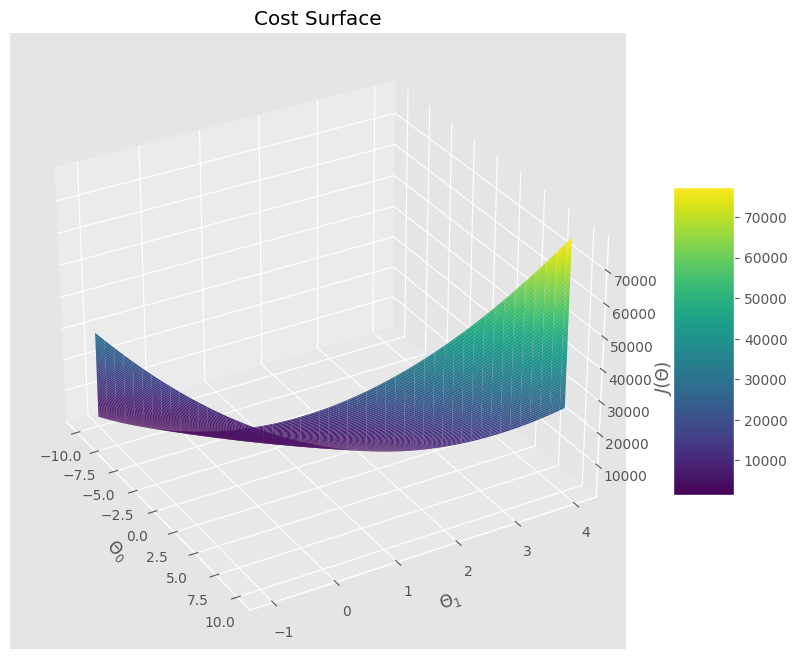

In [338]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap="viridis", linewidth=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30, 330)

plt.show()

Merencanakan Konvergensi

Merencanakan fungsi biaya terhadap jumlah iterasi penurunan gradien:

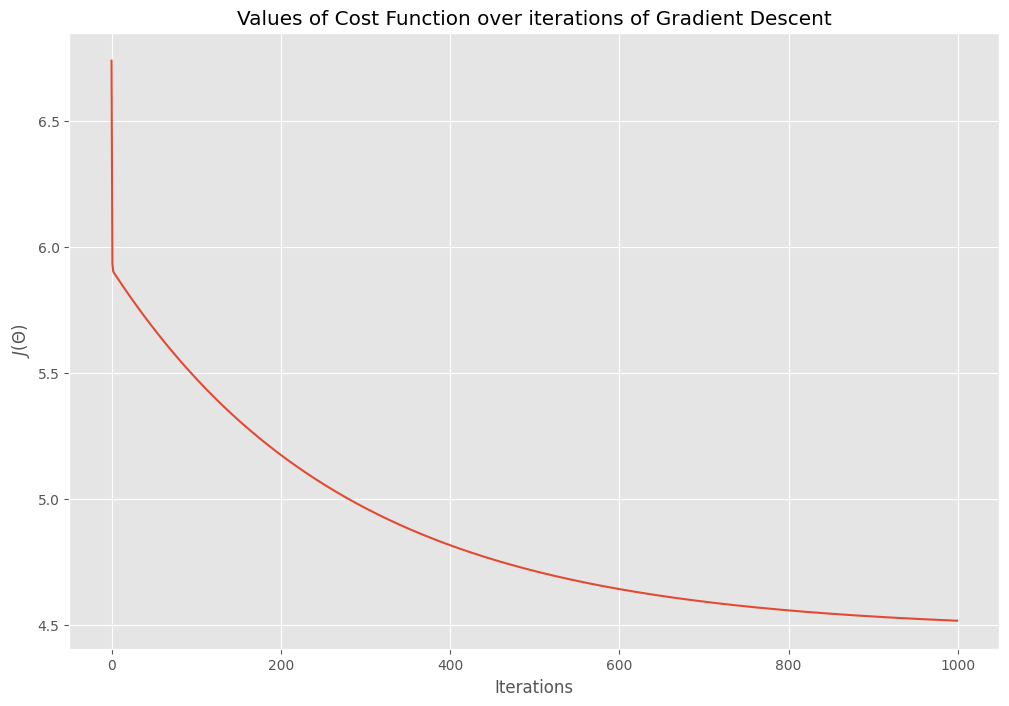

In [339]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

Data Pelatihan dengan Linear Regression Fit

In [354]:
#mengetahui nilai kolerasi dari setiap variabel
#dari hasil koolerasinya 0.83 yang termasuk kategori sangat tinggi
df.corr()

,city_population,food_truck_profit
city_population,1.000000,0.837873
food_truck_profit,0.837873,1.000000


In [266]:
#Recall dataset
df.head()

,city_population,food_truck_profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [350]:
#menentukan variabel x dan y
x = df['city_population'].values.reshape(-1,1)
y = df['food_truck_profit'].values.reshape(-1,1)

In [351]:
#split data menjadi training dan testing dengan porsi 50%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=4)

In [352]:
#membuat object linear regresi
lin_reg = LinearRegression()

In [353]:
#train the model menggunakan training data yang sudah di split
lin_reg.fit(x_train, y_train)

LinearRegression()

In [306]:
#mencari nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[1.09856044]]
[-3.11858238]


In [305]:
# mencari accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test,y_test)

0.7457155528536881

Text(0.5, 1.0, 'populasi kota vs profit keuntungan truk makanan')

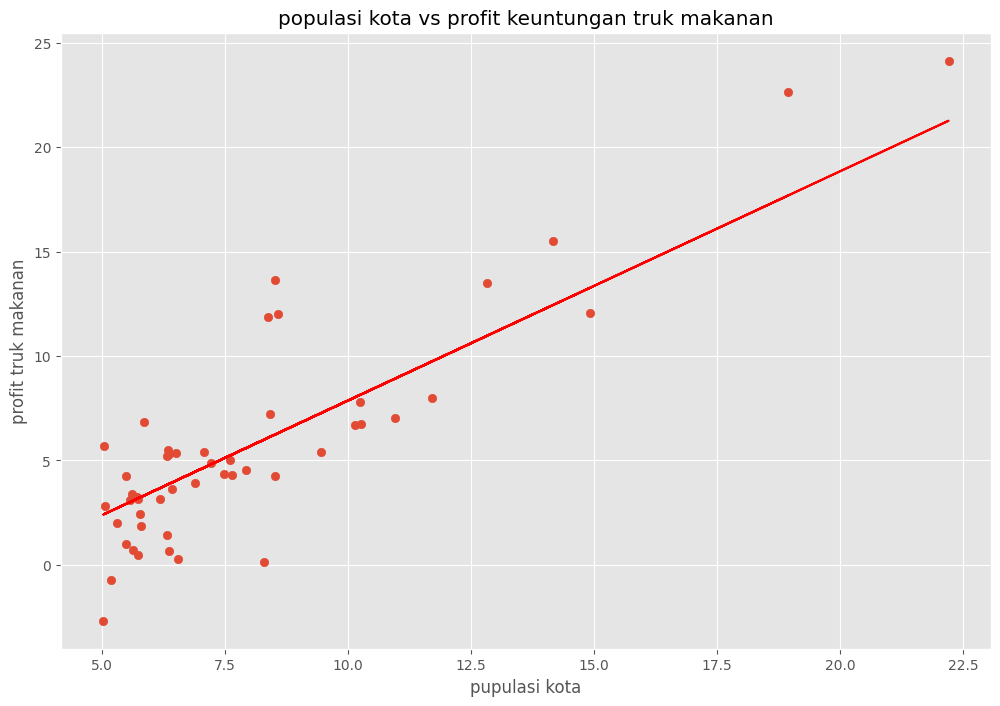

In [356]:
#visualisasi prediksi menggunakan data testing
#garis merah merupakan garis regresi dari persamaan yang didapat
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('pupulasi kota')
plt.ylabel('profit truk makanan')
plt.title('populasi kota vs profit keuntungan truk makanan')

Prediction

In [308]:
# prediksi profit truk makanan dengan populasi 5.000
lin_reg.predict([[5.000]])

array([[2.3742198]])

In [359]:
#prediksi profit truk makanan dengan populasi 8.000
lin_reg.predict([[8.000]])

array([[5.66990112]])

In [360]:
#prediksi profit truk makanan dengan populasi 10.000
lin_reg.predict([[10.000]])

array([[7.86702199]])

In [347]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [357]:
y_pred_1 = predict(np.array([1, 4]),theta) * 10000
print("Untuk jumlah populasi 40,000, pada model memprediksi keuntungan sebesar $" + str(round(y_pred_1, 0)))

Untuk jumlah populasi 40,000, pada model memprediksi keuntungan sebesar $12678.0


In [358]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("Untuk jumlah populasi 83,000, pada model memprediksi keuntungan sebesar $"+str(round(y_pred_2, 0)))

Untuk jumlah populasi 83,000, pada model memprediksi keuntungan sebesar $61151.0
